International CAPM Portfolio

10 Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Data
stocks = ['ADS.DE', 'SAP', 'NDA.DE',
          'SHL.DE', 'UCG.MI', 'STLA',
          'RACE', 'SGO.PA', 'SU.PA',
          'RMS.PA']

# Stocks in foreign Currency:
usd_stocks = ['SAP', 'STLA', 'RACE']
# The rest in EUR
currency = ['EURUSD=X']

# Download
data = yf.download(stocks,
                   start="2023-01-01",
                   end="2024-01-01",
                   interval="1d",
                   # group_by='ticker',
                   auto_adjust=True,
                   threads=True)['Close']
data_fx = yf.download(currency,
                      start="2023-01-01",
                      end="2024-01-01",
                      interval="1d",
                      # group_by='ticker',
                      auto_adjust=True,
                      threads=True)['Close']



[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
data

Ticker,ADS.DE,NDA.DE,RACE,RMS.PA,SAP,SGO.PA,SHL.DE,STLA,SU.PA,UCG.MI
Date,,,,,,,,,,
2023-01-02,127.165176,75.029404,NaN,1460.771729,NaN,45.277451,45.197556,NaN,130.106949,12.766263
2023-01-03,131.327682,74.799194,213.829254,1477.630371,102.279800,46.463379,46.169231,13.374442,131.243927,13.206806
2023-01-04,137.800446,75.547379,218.098495,1540.107544,105.142212,48.536346,46.826824,13.805285,137.026901,13.700520
2023-01-05,137.959778,78.463379,214.534180,1535.644897,104.424149,49.529442,46.532379,13.906119,136.850464,13.799262
2023-01-06,140.090805,79.671974,222.476944,1578.287842,107.325912,50.503254,46.208488,14.162791,139.085236,13.968263
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,184.139999,74.613205,334.619995,1938.091187,152.699997,66.629997,53.139999,23.330000,180.960007,24.420000
2023-12-26,NaN,NaN,335.890015,NaN,153.179993,NaN,NaN,23.450001,NaN,NaN
2023-12-27,185.559998,75.297188,338.339996,1926.509766,155.899994,66.699997,53.099998,23.590000,181.899994,24.450001


In [3]:
# Data prep
# data.rename(columns={'ADS.DE': 'Adidas AG',
#                         "SAP": "SAP SE",
#                         "NDA.DE": "Northern Data AG",
#                         "SHL.DE": "Siemens Healthineers",
#                         "UCG.MI": "Unicredit SpA",
#                         "STLA": "Stellantis",
#                         "RACE": "Ferrari",
#                         "SGO.PA": "Compagnie de Saint-Gobain SA",
#                         "SU.PA": "Schneider Electric SE",
#                         "RMS.PA": "Hermès International"
#                         })

# data_fx.rename(columns={'Close': 'EUR/USD'})


In [4]:
# Data prep2
data = data.ffill()
data_fx = data_fx.ffill()


# Daily returns
daily_returns = data.pct_change().dropna()
daily_fx_returns = pd.DataFrame(data_fx.pct_change().dropna())

# Currency adjusted returns
# for stocks in usd_stocks:
#     daily_returns[stocks] *= daily_fx_returns




In [5]:
def adjust(row):
    for stockk in row.keys():
        row[stockk] = float(float(1+row[stockk]) * float(1+ daily_fx_returns.loc[row.name].iloc[0])) -1 
    return row 


In [6]:
currency_adj_daily_returns = daily_returns.copy()
currency_adj_daily_returns.loc[:, usd_stocks] = currency_adj_daily_returns.loc[:, usd_stocks].apply(lambda row: adjust(row),axis=1)

In [7]:
daily_returns

Ticker,ADS.DE,NDA.DE,RACE,RMS.PA,SAP,SGO.PA,SHL.DE,STLA,SU.PA,UCG.MI
Date,,,,,,,,,,
2023-01-04,0.049287,0.010003,0.019966,0.042282,0.027986,0.044615,0.014243,0.032214,0.044063,0.037383
2023-01-05,0.001156,0.038598,-0.016343,-0.002898,-0.006829,0.020461,-0.006288,0.007304,-0.001288,0.007207
2023-01-06,0.015447,0.015403,0.037023,0.027769,0.027788,0.019661,-0.006961,0.018457,0.016330,0.012247
2023-01-09,0.006966,0.039490,0.020930,0.012253,0.021355,0.011646,0.018904,0.011003,0.020578,-0.006797
2023-01-10,-0.011012,-0.007876,0.013900,-0.002793,0.017767,-0.023967,-0.009798,0.016005,-0.003729,-0.000958
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.052875,0.003944,-0.004255,-0.025600,0.003417,0.007866,0.000000,-0.003843,0.002882,0.003287
2023-12-26,0.000000,0.000000,0.003795,0.000000,0.003143,0.000000,0.000000,0.005144,0.000000,0.000000
2023-12-27,0.007712,0.009167,0.007294,-0.005976,0.017757,0.001051,-0.000753,0.005970,0.005194,0.001229


In [8]:
currency_adj_daily_returns

Ticker,ADS.DE,NDA.DE,RACE,RMS.PA,SAP,SGO.PA,SHL.DE,STLA,SU.PA,UCG.MI
Date,,,,,,,,,,
2023-01-04,0.049287,0.010003,0.007466,0.042282,0.015388,0.044615,0.014243,0.019564,0.044063,0.037383
2023-01-05,0.001156,0.038598,-0.010792,-0.002898,-0.001225,0.020461,-0.006288,0.012988,-0.001288,0.007207
2023-01-06,0.015447,0.015403,0.028796,0.027769,0.019634,0.019661,-0.006961,0.010377,0.016330,0.012247
2023-01-09,0.006966,0.039490,0.033942,0.012253,0.034372,0.011646,0.018904,0.023888,0.020578,-0.006797
2023-01-10,-0.011012,-0.007876,0.021213,-0.002793,0.025108,-0.023967,-0.009798,0.023333,-0.003729,-0.000958
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.052875,0.003944,0.001246,-0.025600,0.008961,0.007866,0.000000,0.001661,0.002882,0.003287
2023-12-26,0.000000,0.000000,0.003220,0.000000,0.002568,0.000000,0.000000,0.004568,0.000000,0.000000
2023-12-27,0.007712,0.009167,0.009374,-0.005976,0.019859,0.001051,-0.000753,0.008047,0.005194,0.001229


In [9]:
# Simulation
n_samples = 100000
n_stocks = len(stocks)
all_weights = np.zeros((n_samples, n_stocks))
portfolio_returns = np.zeros(n_samples)
portfolio_volatilities = np.zeros(n_samples)
sharpe_ratios = np.zeros(n_samples)

# Risk Free Rate
risk_free_rate = 0.0433
# 10 year US treasury rate 4.33% for Feb 22, 2024
# https://ycharts.com/indicators/10_year_treasury_rate

In [10]:
results = pd.DataFrame()
for i in range(n_samples):
    weights = np.random.random(n_stocks)
    weights /= np.sum(weights)
    all_weights[i, :] = weights
    portfolio_return = np.sum(weights * currency_adj_daily_returns.mean()) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(currency_adj_daily_returns.cov() * 252, weights))) # STD
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    portfolio_returns[i] = portfolio_return
    portfolio_volatilities[i] = portfolio_volatility
    sharpe_ratios[i] = sharpe_ratio 
    dictt = {}
    for stoc, weight in zip(stocks, weights):
        dictt[stoc] = weight 
    results = pd.concat([results, pd.DataFrame(dict({'Return':portfolio_return, 'Volatilities':portfolio_volatility, 'Sharpe':sharpe_ratio}, **dictt),  index=[1])], ignore_index=True)
    # break

# Its not quick but it works

In [11]:
results

,Return,Volatilities,Sharpe,ADS.DE,SAP,NDA.DE,SHL.DE,UCG.MI,STLA,RACE,SGO.PA,SU.PA,RMS.PA
0,0.410249,0.187835,1.953565,0.192172,0.057878,0.106870,0.115391,0.090917,0.087027,0.024215,0.011384,0.158303,0.155843
1,0.342015,0.172472,1.731968,0.020624,0.116271,0.105554,0.155691,0.120816,0.079332,0.149772,0.039337,0.139456,0.073147
2,0.382598,0.181125,1.873279,0.133432,0.098798,0.118430,0.112502,0.066328,0.127281,0.086109,0.071446,0.083587,0.102087
3,0.423333,0.187077,2.031428,0.110821,0.088458,0.053609,0.032832,0.079630,0.163696,0.027351,0.170579,0.162447,0.110576
4,0.398308,0.183455,1.935128,0.020812,0.195931,0.184262,0.008214,0.224311,0.050555,0.035391,0.010014,0.088357,0.182152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.350998,0.179721,1.712086,0.143775,0.122237,0.099203,0.011767,0.118774,0.122253,0.137766,0.073283,0.144216,0.026725
99996,0.411870,0.190276,1.937029,0.169110,0.078190,0.067573,0.140310,0.062593,0.116350,0.010297,0.063690,0.128868,0.163019
99997,0.378030,0.189104,1.770086,0.110549,0.180849,0.110945,0.025011,0.062057,0.084104,0.135551,0.054316,0.026290,0.210328
99998,0.314387,0.185429,1.461951,0.141162,0.169925,0.003580,0.149763,0.134546,0.009001,0.173150,0.030623,0.087605,0.100645


In [12]:
pd.DataFrame(results.iloc[results['Sharpe'].idxmax()])
#locate positon of portfolio with minimum standard deviation
# min_vol_port = results_frame.iloc[results_frame['Standard_Deviation'].idxmin()]

,1266
Return,0.511950
Volatilities,0.183128
Sharpe,2.559131
ADS.DE,0.006398
SAP,0.006789
NDA.DE,0.193109
SHL.DE,0.022351
UCG.MI,0.227907
STLA,0.117010
RACE,0.040503


In [13]:
# Find the market portfolio
index_market_portfolio = np.argmax(sharpe_ratios)
market_return = portfolio_returns[index_market_portfolio]
market_volatility = portfolio_volatilities[index_market_portfolio]

In [14]:
# Minimum Volatility Portfolio
index_minimum_volatility_portfolio = np.argmin(portfolio_volatilities)
min_return = portfolio_returns[index_minimum_volatility_portfolio]
min_volatility = portfolio_volatilities[index_minimum_volatility_portfolio]

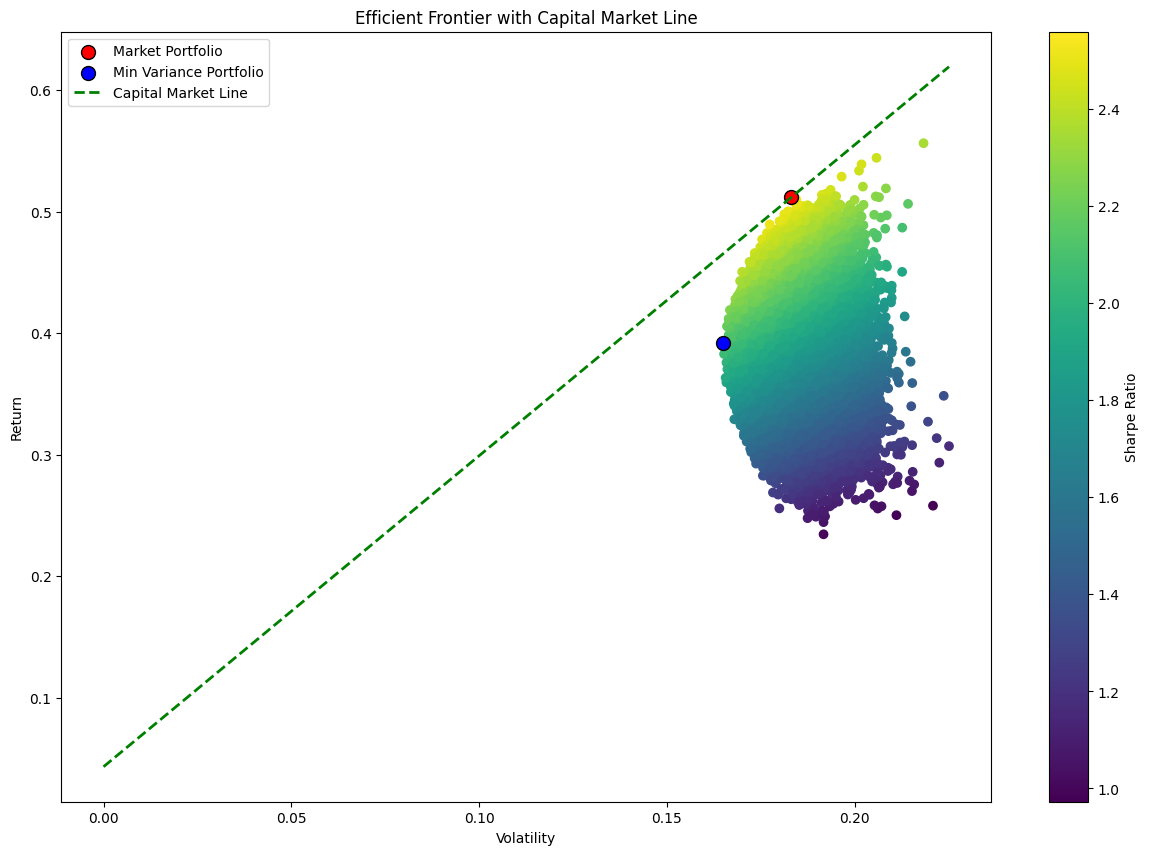

In [15]:
# Plot 
plt.figure(figsize=(15,10))

# Scatter
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Market Portfolio
plt.scatter(market_volatility, market_return,
            # marker=(5,1,180),
            c='red', s=100,
            edgecolors='black', label='Market Portfolio')

# Min Volatility Portfolio
plt.scatter(min_volatility, min_return,
            # marker=(5,1,180),
            c='blue', s=100,
            edgecolors='black', label='Min Variance Portfolio')

# CML
x = np.linspace(0, max(portfolio_volatilities), num=100)
cml_y = risk_free_rate + ((market_return - risk_free_rate) / market_volatility) * x
plt.plot(x, cml_y, c='green', linestyle='--', linewidth=2, label='Capital Market Line')

# Plot adjustments
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()

plt.show()